# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This [dataset](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&source=editors&ust=1659841271184807&usg=AOvVaw0x8M2SKNEYLn7uNf7MsLfg?embedded=True) collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- 'ScheduledDay' tells us on what day the patient set up their appointment.
- 'Neighborhood' indicates the location of the hospital.
- 'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- 'Hipertension','Diabetes', 'Alcoholism', 'Handcap' are various characteristics describing the patient. 1 means the patient has that attribute while 0 means the patient does not have that attribute.
- 'SMS_received' indicates whether the patient recieved an SMS or not. 0 means the patient did not receive an SMS while 1 indicates the patient received an SMS.
- 'No-show' says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis

1. Does the patients' gender, hospital location and the disease type affect the patient show ups?
2. The Age range of patients that show up more. Are the older people seeming to take care of their health more than the youth?
3. Why 20% of the patients did not show up for their scheduled appointment.
4. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Import the libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load the data and print out a few lines.
df=pd.read_csv(r'C:\Users\TEMINIJESU OGUNLEYE\Downloads\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Get the number of rows and columns you are working with
df.shape

(110527, 14)

In [4]:
#Determine if there is a missing or duplicated data
##Load the Column/field information and the data type
df.info()
##scheduled day and appointment day should be datetime datatype not string(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#change the data type of scheduled day and appointment day to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [6]:
#Check the datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [7]:
#Check for duplicate and missing data
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**There are no missing data or duplicated ones**.

In [9]:
#Summary Statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Cleaning activities to be done
1. Drop patient and Appointment ID columns as they are not needed for this analysis
2. Correctly name Handcap as Handicap and Hipertension as Hypertension
3. Drop all negative values for Age as shown in the Summary statistics (Age cannot be negative)
4. Handcap column has 5 unique Values which ordinarily should be 2 (0 or 1). Drop the others
5. Rename the No-show column.

#### 1. Drop Patient and Appointment ID Columns

In [11]:
df.drop(['PatientId', 'AppointmentID'],axis=1, inplace=True)

In [12]:
#Confirm it was correctly dropped
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2. Correctly name Handcap as Handicap and Hipertension as Hypertension

In [13]:
df = df.rename(columns={'Handcap':'Handicap', 'Hipertension':'Hypertension'})
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 3. Drop all negative values for Age as shown in the Summary statistics (Age cannot be negative)

In [14]:
df_Age = df[df['Age']>=0]
df_Age['Age'].value_counts()
#### Negative Age has been dropped

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

#### 4. Create a new Variable called df_Handicap to store only Handicap patients. Count the Value other than zero in the Handicap Column

In [15]:
df_Handicap = df[df['Handicap'] >=1]
df_Handicap['Handicap'].value_counts()

1    2042
2     183
3      13
4       3
Name: Handicap, dtype: int64

#### 5. Rename the No-show column to avoid confusion

In [16]:
df = df.rename(columns={'No-show':'Absent'})
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'Absent'],
      dtype='object')

In [17]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [18]:
#### Cleaned dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hypertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handicap        110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  Absent          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


array([[<AxesSubplot:title={'center':'ScheduledDay'}>,
        <AxesSubplot:title={'center':'AppointmentDay'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handicap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

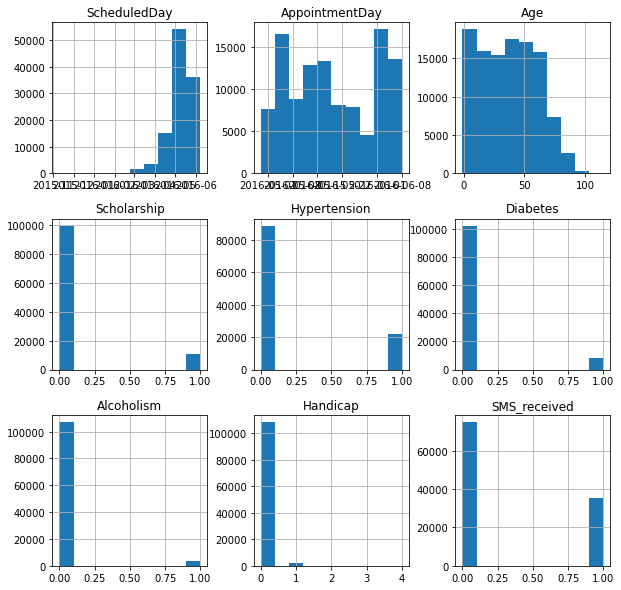

In [19]:
###Data distribution through visualization
df.hist(figsize=(10,10))

**The data has been cleaned to ensure value driven factors are only 0 and 1 as represented. Handicap had other values than 1, but they have been dropped as this would have affected our data distribution.**

**Quick digging Questions for Exploration**
- How many of the people that did not show up are female and male?
- How many of the people that showed up are female and male?

<a id='eda'></a>
## Exploratory Data Analysis

### 1.  Does the patients' gender, hospital location and the disease type affect the patient's Absence?

In [20]:
# Attendance by Gender
## Count of Absentees by Gender
Absentees_count = df[df['Absent']=='Yes']
Attendees_count = df[df['Absent']=='No']
Absentees_count['Gender'].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [21]:
## Count of Attendees by Gender
Attendees_count['Gender'].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Male Vs Female attendance')

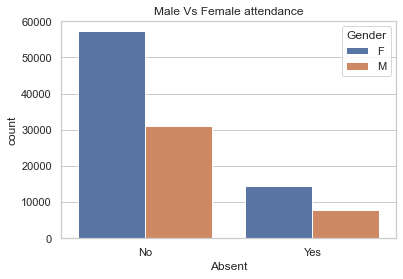

In [22]:
sns.set_theme(style='whitegrid')
sns.countplot(x=df['Absent'], hue=df['Gender']);
plt.title('Male Vs Female attendance')

**The number of female that showed up is more than the male. There were also more female that did not show up than male.**

**Overrall, there were more female than male in the dataset**

In [23]:
def Absence_count(x):
    if(x=='Yes'):
        x = 1
    else:
        x = 0
    return(x)    

In [24]:
#Hospital Location
#Top ten location that did not show up
df_Neighbourhood = df.assign(CountofAbsentbyNeighbourhood=df['Absent']);
df_Neighbourhood['CountofAbsentbyNeighbourhood'] = df_Neighbourhood['CountofAbsentbyNeighbourhood'].apply(Absence_count)
df_Neighbourhood.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent,CountofAbsentbyNeighbourhood
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [25]:
df_Absent1 = df_Neighbourhood[['Neighbourhood', 'CountofAbsentbyNeighbourhood']]
df_Absent1.head(10)

,Neighbourhood,CountofAbsentbyNeighbourhood
0,JARDIM DA PENHA,0
1,JARDIM DA PENHA,0
2,MATA DA PRAIA,0
3,PONTAL DE CAMBURI,0
4,JARDIM DA PENHA,0
5,REPÚBLICA,0
6,GOIABEIRAS,1
7,GOIABEIRAS,1
8,ANDORINHAS,0
9,CONQUISTA,0


In [26]:
df_Absent2 = df_Absent1[df_Absent1['CountofAbsentbyNeighbourhood'] >=1]
df_Present = df_Absent1[df_Absent1['CountofAbsentbyNeighbourhood'] <=0]
df_Absent3 = df_Absent2.groupby(['Neighbourhood']).count()
df_Present1 = df_Present.groupby(['Neighbourhood']).count()

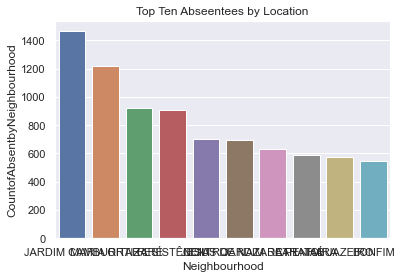

In [27]:
df_Absent4 = df_Absent3.nlargest(10,'CountofAbsentbyNeighbourhood')
df_Absent4['Neighbourhood'] = df_Absent4.index
sns.set_theme(style='darkgrid')
sns.barplot(y='CountofAbsentbyNeighbourhood', x='Neighbourhood', data=df_Absent4).set_title('Top Ten Abseentees by Location');
sns.set(font_scale=18)
sns.set(rc={'figure.figsize':(10,5)})

**The visual shows the Top ten location with the highest number of no-show ups. There are Information as to maybe a cluster or goegraphy to further drill down if there is a common base for these locations.**

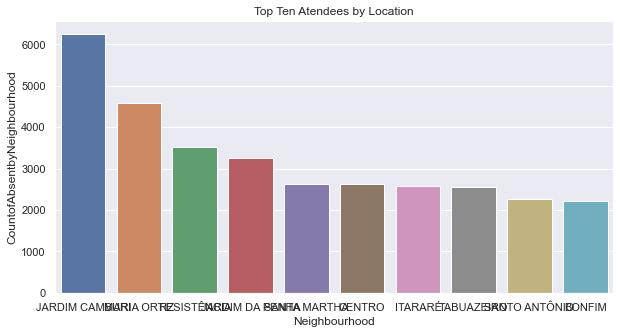

In [28]:
df_Present2 = df_Present1.nlargest(10,'CountofAbsentbyNeighbourhood')
df_Present2['Neighbourhood'] = df_Present2.index
sns.set_theme(style='darkgrid')
sns.barplot(y='CountofAbsentbyNeighbourhood', x='Neighbourhood', data=df_Present2).set_title('Top Ten Atendees by Location');
sns.set(font_scale=38)
sns.set(rc={'figure.figsize':(20,10)})

**Top Ten Location by attendance. Again Jardim Camburi had the highest number of attendees just just non-attendees. This can be attributed to the high number of representation on the dataset.** 

In [29]:
#Attendance and Non-Attendance by Age
##Non-Attendance by Age
###Segment the Age for ease of visualization.
Absentees_Age = Absentees_count.loc[:, ('Age', 'Absent')]
Absentees_Age['Age'] = [round(a,-1)for a in Absentees_Age['Age']]
###Count the Number represented per segment
Absentees_Age['Age'].value_counts()

20     3892
40     3371
30     2993
10     2741
50     2577
60     2494
0      2185
70     1115
80      756
90      182
100      10
120       3
Name: Age, dtype: int64

In [30]:
##Attendance by Age
###Segment the Age for ease of visualization.
Attendees_Age = Attendees_count.loc[:, ('Age', 'Absent')]
Attendees_Age['Age'] = [round(a,-1)for a in Attendees_Age['Age']]
###Count the Number represented per segment
Attendees_Age['Age'].value_counts()

60     13134
40     12589
20     11450
50     11435
30     10033
0       9547
10      8785
70      6250
80      4020
90       908
100       55
120        2
Name: Age, dtype: int64

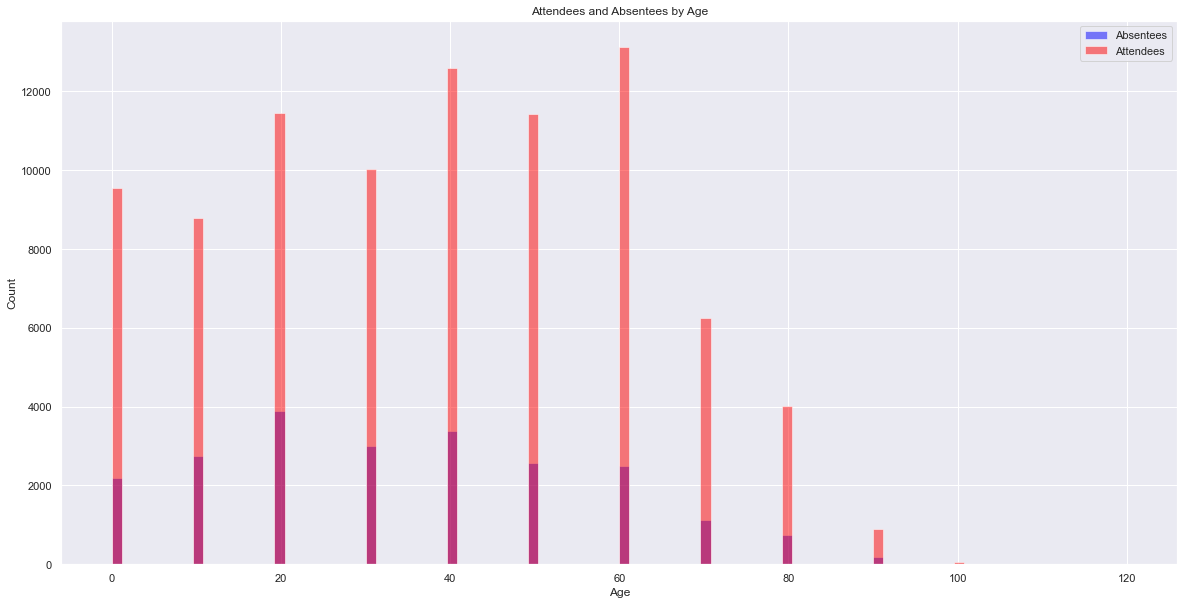

In [31]:
kwargs =dict(alpha=0.5, bins=100)
plt.hist(Absentees_Age['Age'], **kwargs, color='blue', label='Absentees')
plt.hist(Attendees_Age['Age'], **kwargs, color='red', label='Attendees')
plt.gca().set(title='Attendees and Absentees by Age', ylabel='Count', xlabel='Age')
plt.legend()

**The Highest number of attendees were within the age bracket of 40-60 while the highest number of absentees were within the age bracket of 20-40. This might be an Indication that the youths within the 20-40 age bracket seems to take their health less serious and starts taking it serious as they advance from 40-60.**

<a id='conclusions'></a>
## Conclusions

The factors that affect the absence of the patients seems to be clearer now. The gender and age seems to be the most Important factor as female and the seemingly older people between the ages of 40-60 seems to show up for their appointment more than the male and Younger/Older people than that age bracket. 
Some Neighbourhoods also had very high spread of the disease. We might need to search about the neighbourhood and see if there is a common factor for those neighbourhoods with high spread of the disease. Also, we might also need to search for more factors to help patient remember their appointments and show up.

**Limitations**
1. The dataset did not talk about the neighbourhoods and why some neighbourhoods might have high spread of the disease
2. Two or more factors could have led to patients not showing up for their appointment, it was difficult to attribute no show up to only one factor
3. Some patients received SMS notifications and still did not show up. There might have been other factors attributable to this behaviour from the patients.
4. The data set was more of female patients and the analysis did not zoom in trying to identify the proportion of female that showed up Vs those that did not show up vis-a-vis their male counterpart.